# [Lab 9] Plotting in Python with pandas & seaborn

Marco Chierici

May 16, 2023

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.style.use('ggplot')
%matplotlib inline

# Dataset for this lab

Canada immigration dataset (from UN International Migration Flows data)

- [info](https://www.un.org/development/desa/pd/data/international-migration-flows)
- [XLS table](https://docs.google.com/spreadsheets/d/1GzaKjWDXhqDMdgDr90WUlOnC69fqjoAj/edit?usp=share_link&ouid=106989670198624528744&rtpof=true&sd=true)

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

We'll focus on the Canadian immigration data.

# Short crash course on pandas

[pandas](http://pandas.pydata.org/) is one of the key data analysis toolkits available for Python. From the website:

>pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

We can say that "pandas" is the Python counterpart of "dplyr" and the "tidyverse" in R.

*pandas* facilitates operations ranging from data I/O (reading and writing to different file formats as CSV, Excel) to data wrangling and even visualization.

## The basics

Pandas facilitates file I/O from and to different file formats, such as comma- or tab-separated files (CSV, TSV), and MS Excel files (XLS, XLSX).

To read Excel files, pandas requires the additional module `openpyxl`:

```pip install openpyxl```

In [6]:
import pandas as pd
import numpy as np

We can now import the primary Canadian Immigration dataset using pandas' `read_excel` method.

In [7]:
data_file = "Canada.xlsx"

df = pd.read_excel(
    data_file,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.

In [10]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


List of column names:

In [11]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

To get the row names (*indices*):

In [12]:
df.index

RangeIndex(start=0, stop=195, step=1)

Note that `columns` and `index` are not Python lists, but it is easy to convert them to lists!

In [13]:
df.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [14]:
len(df.index.tolist())

195

To view the dimensions of the dataframe, we use the `shape` instance variable.

In [15]:
df.shape

(195, 43)

**Note**: The main types stored in *pandas* objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]`, `timedelta[ns]`, `category`, and `object` (string). In addition, these dtypes have item sizes, e.g. `int64` and `int32`.


Let's clean the data set to remove a few unnecessary columns, such as AREA, REG, DEV, Type, and Coverage.

We use the `drop()` method as follows (note that we perform the operation *in place*):

In [16]:
# axis=0 represents rows (default) and axis=1 represents columns
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` by passing in a dictionary of old and new names:

In [17]:
rename_dict = {'OdName':'Country', # old: new
               'AreaName':'Continent',
               'RegName':'Region'}

df.rename(columns=rename_dict, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [18]:
df['Total'] = df.sum(axis=1, numeric_only=True)

In [19]:
# sum only certain columns
col_list = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
df['Sum'] = df[col_list].sum(axis=1)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,3693
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,856,702,560,716,561,539,620,603,15699,9
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,1271
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,6,3
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,15,2


Quick check to see how many null elements are in the dataset, by column:

In [20]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
Sum          0
dtype: int64

The `describe()` method provides a quick summary of each column in the dataframe (i.e., same as R's `summary()`)

In [21]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282,5422.938462
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686,17099.940917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000,10.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000,240.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000,3321.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000,179171.000000


Just for visualization purposes, let's also shorten the label for the country "United Kingdom of Great Britain and Northern Ireland":

In [22]:
df.Country[df.Country == "United Kingdom of Great Britain and Northern Ireland"] = "UK"

/tmp/ipykernel_732751/1573972514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Country[df.Country == "United Kingdom of Great Britain and Northern Ireland"] = "UK"


## Indexing and selection

### Column selection

There are two possible ways:

1. the **easy** one - use `df.column_name` (only works if the column name does NOT have spaces or special characters). Returns a pandas Series

2. the **flexible** one - use
  - `df['column_name']`, which returns a pandas Series
  - `df[['column1', 'column2']]`, which returns a pandas DataFrame
  
  
Example: select the `Country` column.

In [23]:
df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Example: select the `Country` column and the years 1980-1983.

In [24]:
df_sel = df[['Country', 1980, 1981, 1982, 1983]]
df_sel.head()

,Country,1980,1981,1982,1983
0,Afghanistan,16,39,39,47
1,Albania,1,0,0,0
2,Algeria,80,67,71,69
3,American Samoa,0,1,0,0
4,Andorra,0,0,0,0


### Row selection

There are two alternative ways to select rows:

1. by label, `df.loc[label]`
2. by position, `df.iloc[index]`

Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

In [25]:
df.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

df.head(7)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,3693
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,856,702,560,716,561,539,620,603,15699,9
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,1271
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,3
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,1,0,0,0,0,1,1,15,2
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,184,106,76,62,61,39,70,45,2113,50
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,32,15,32,38,27,37,51,25,981,291


In [26]:
# optional: to remove the name of the index
# df.index.name = None

Let's view the number of immigrants from Japan (row 87) for the following scenarios:

1. The full row data (all columns)
2. For year 2013
3. For years 1980-1985

In [27]:
# full row data
df.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [28]:
# alternatives
df.iloc[87]

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [29]:
df.iloc[87].to_frame() # typecast to DataFrame

,Japan
Continent,Asia
Region,Eastern Asia
DevName,Developed regions
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248


In [30]:
df[df.index == "Japan"]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1212,1250,1284,1194,1168,1265,1214,982,27707,4296


In [31]:
# for year 2013
df.loc['Japan', 2013]

982

In [32]:
# alternative:
df.iloc[87, 36] # year 2013 is the last column, with a positional index of 36

982

In [33]:
# for years 1980 to 1985
df.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [34]:
# for years 1980 to 1985
df.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]].to_frame()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198


In [35]:
# alternative
df.iloc[87, [3, 4, 5, 6, 7, 8]].to_frame()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198


For consistency, let's ensure that all column labels are of type `str`:

In [36]:
all( isinstance(column, str) for column in df.columns )

False

Notice how the above line of code returned False when we tested if all the column labels are of type `str`.

It is unusual to have column names that aren't strings: this may create some confusion.

To avoid ambiguities, we convert all column names into strings:

In [37]:
df.columns = list( map(str, df.columns) )
# [print (type(x)) for x in df.columns.values]

Since we converted the years to string, let's create a variable storing the full range of years (will be useful for plotting later on):

In [38]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Condition-based filtering

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

In [39]:
condition = df['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [40]:
df_flt = df[condition]
df_flt.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,3693
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,218,198,205,267,252,236,258,207,3310,0
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,236,203,125,165,209,138,161,57,2649,0
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,22,9,35,28,21,39,32,475,29
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4014,2897,2939,2104,4721,2694,2640,3789,65568,2376


You can filter on multiple criteria at once: however, note that

1. pandas requires you to use the &, | logical operators instead of `and`, `or`
2. you need to enclose each condition in parentheses

In [41]:
df[(df['Continent'] == 'Asia') & (df['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,3693
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4014,2897,2939,2104,4721,2694,2640,3789,65568,2376
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,10,7,36,865,1464,1879,1075,487,5876,2
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,33848,28742,28261,29456,34235,27509,30933,33087,691904,82154
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,7480,6974,6475,6580,7477,7479,7534,11291,175923,21477
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,2,1,7,4,3,1,1,30,1
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,540,511,581,561,1392,1129,1185,1308,10222,51
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13127,10124,8994,7217,6811,7468,11227,12603,241600,10591
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4714,4123,4756,4547,4422,3309,3338,2394,148358,14796


In [42]:
df[(df['Continent'] == 'Africa') & (df['Region'] == 'Eastern Africa')].head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,1,...,468,614,448,566,529,604,684,480,8110,24
Comoros,Africa,Eastern Africa,Developing regions,0,2,2,0,0,2,1,...,7,11,3,19,22,14,18,22,194,11
Djibouti,Africa,Eastern Africa,Developing regions,0,1,1,5,1,0,4,...,68,50,47,70,123,127,164,201,1646,24
Eritrea,Africa,Eastern Africa,Developing regions,0,0,0,0,0,0,0,...,700,699,799,904,931,1182,1335,1719,10450,0
Ethiopia,Africa,Eastern Africa,Developing regions,98,59,54,98,154,157,302,...,1801,1512,1613,1289,1865,2163,1864,1606,35136,3263
Kenya,Africa,Eastern Africa,Developing regions,291,296,221,201,218,245,244,...,622,449,453,489,507,585,725,664,17228,4468
Madagascar,Africa,Eastern Africa,Developing regions,22,10,13,32,30,18,10,...,96,115,118,169,178,148,165,229,2194,240
Malawi,Africa,Eastern Africa,Developing regions,5,4,6,3,2,0,4,...,15,13,5,10,28,16,9,10,294,36
Mauritius,Africa,Eastern Africa,Developing regions,306,259,353,170,207,164,325,...,512,507,714,872,1455,1146,799,1203,15690,3292


In [43]:
df.shape

(195, 39)

In [44]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,3693
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,856,702,560,716,561,539,620,603,15699,9
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,1271
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,3
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,1,0,0,0,0,1,1,15,2


# Plotting with pandas

We can plot pandas dataframes directly! This implicitly uses `matplotlib.pyplot`.

Plotting in pandas is as simple as using a `.plot()` method on a series or dataframe.

## Line chart

### Case study: the 2010 Haiti earthquake

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about 3M people were affected by this natural disaster.

As part of Canada's humanitarian effort, the Canadian government stepped up its effort in accepting refugees from Haiti.

Task: plot a line graph of immigration from Haiti.

In [45]:
df[years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [46]:
haiti = df.loc['Haiti', years] # select years 1980-2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot: >

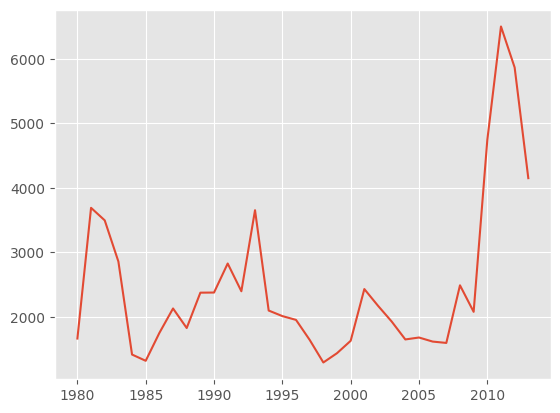

In [47]:
haiti.plot()

<AxesSubplot: >

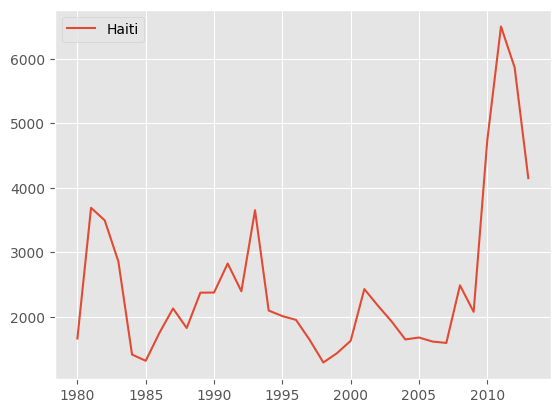

In [48]:
haiti.to_frame().plot()

We clearly notice how the number of immigrants from Haiti to Canada spiked up from 2010.

To further customize the plot with labels, title, legends, etc. we do that the matplotlib way:

Text(0, 0.5, 'Number of immigrants')

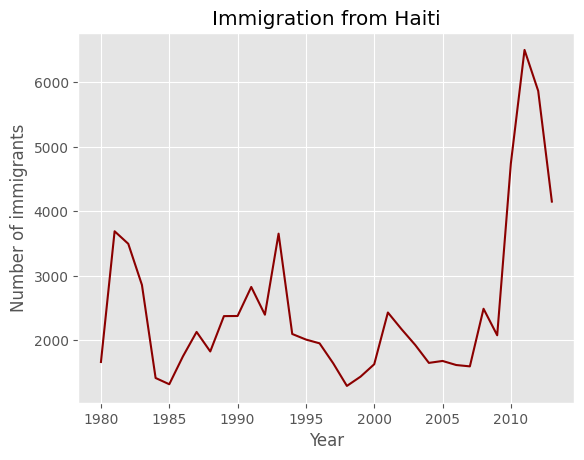

In [49]:
haiti.plot(kind='line', color="darkred") # kind="line" by default

plt.title("Immigration from Haiti")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

We can annotate the spike using `plt.text` or `plt.annotate`: beforehand, we remember that the years are stored as strings, so we convert them back to integers. 

We also add `plt.show()` at the end to avoid unnecessary echoing from matplotlib:

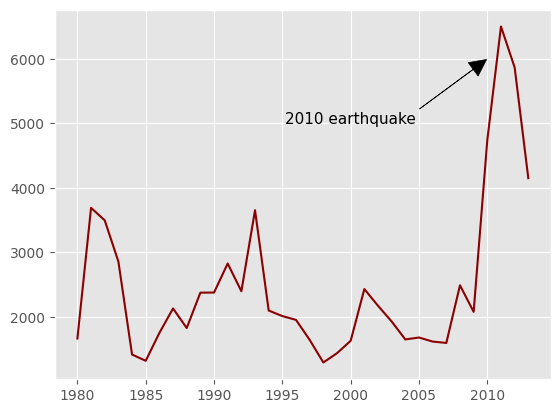

In [50]:
haiti.index = haiti.index.map(int)

haiti.plot(kind='line', color="darkred")
plt.annotate('2010 earthquake', xy=(2010, 6000), xytext=(2000, 5000),
             arrowprops=dict(color='black', shrink=0.01, width=0.1), 
             fontsize=11, color='black', horizontalalignment='center')
plt.show()

Now we can add more countries to the line plot to make meaningful comparisons: for example, let's compare the number of immigrants from India and China from 1980 to 2013.

In [51]:
df_ci = df.loc[['China','India'], years]
df_ci.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<AxesSubplot: xlabel='Country'>

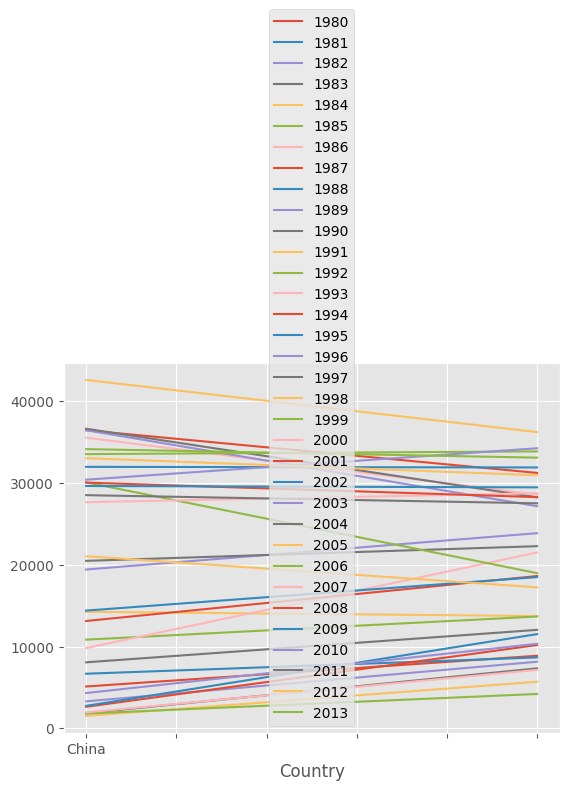

In [52]:
df_ci.plot(kind="line")

What happened?

pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_ci` is a dataframe with `country` as the index and `years` as the columns, we must first transpose the dataframe using the `transpose()` method.

In [53]:
df_ci = df_ci.transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


pandas will auomatically plot the two countries on the same graph and add a legend.

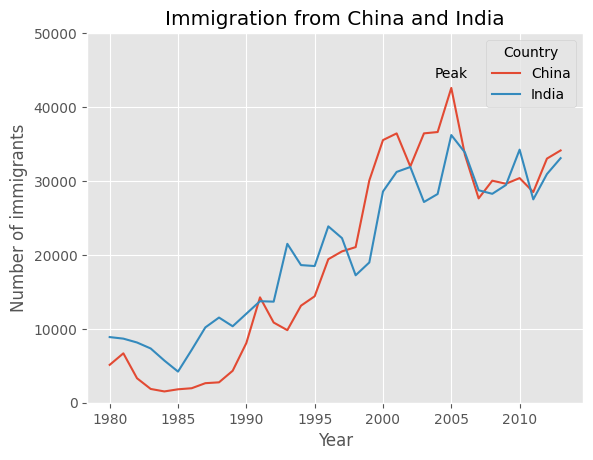

In [54]:
df_ci.index = df_ci.index.map(int)

df_ci.plot()

plt.title("Immigration from China and India")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.text(2005, 44000, "Peak", horizontalalignment="center")
plt.ylim(0, 50000)
plt.show()

From this plot, it seems like China and India have similary immigration patterns to Canada through the years.

Task: compare the trend of the 5 countries that contributed the most to immigration in Canada, in terms of total number of immigrants.

In [55]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top = df.head(5)
df_top

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,33848,28742,28261,29456,34235,27509,30933,33087,691904,82154
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,33518,27642,30037,29622,30391,28502,33024,34129,659962,32003
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7140,8216,8979,8876,8724,6204,6195,5827,551500,179171
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18400,19837,24887,28573,38617,36765,34315,29544,511391,60764
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13127,10124,8994,7217,6811,7468,11227,12603,241600,10591


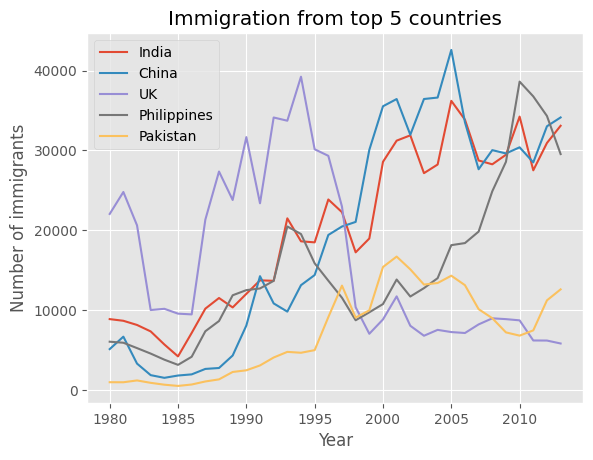

In [56]:
#df_top5.index = df_top5.index.map(int)
#df_top5.plot(kind='line', figsize=(14, 8))
df_top = df.head(5)
df_top = df_top[years].transpose()

df_top.plot().legend(loc="best")

plt.title("Immigration from top 5 countries")
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

The legend position is not quite optimal: let's place it ouside the plot area.

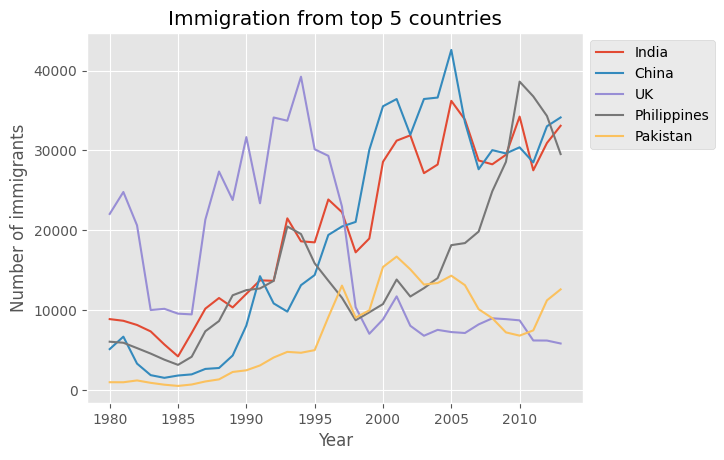

In [57]:
df_top.plot().legend(bbox_to_anchor=(1, 1))

plt.title("Immigration from top 5 countries")
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

## A few common plots

### Area chart

We can represent the information of the above plot as an area chart (also called stacked line plot), simply using `kind='area'` within pandas `plot()`.

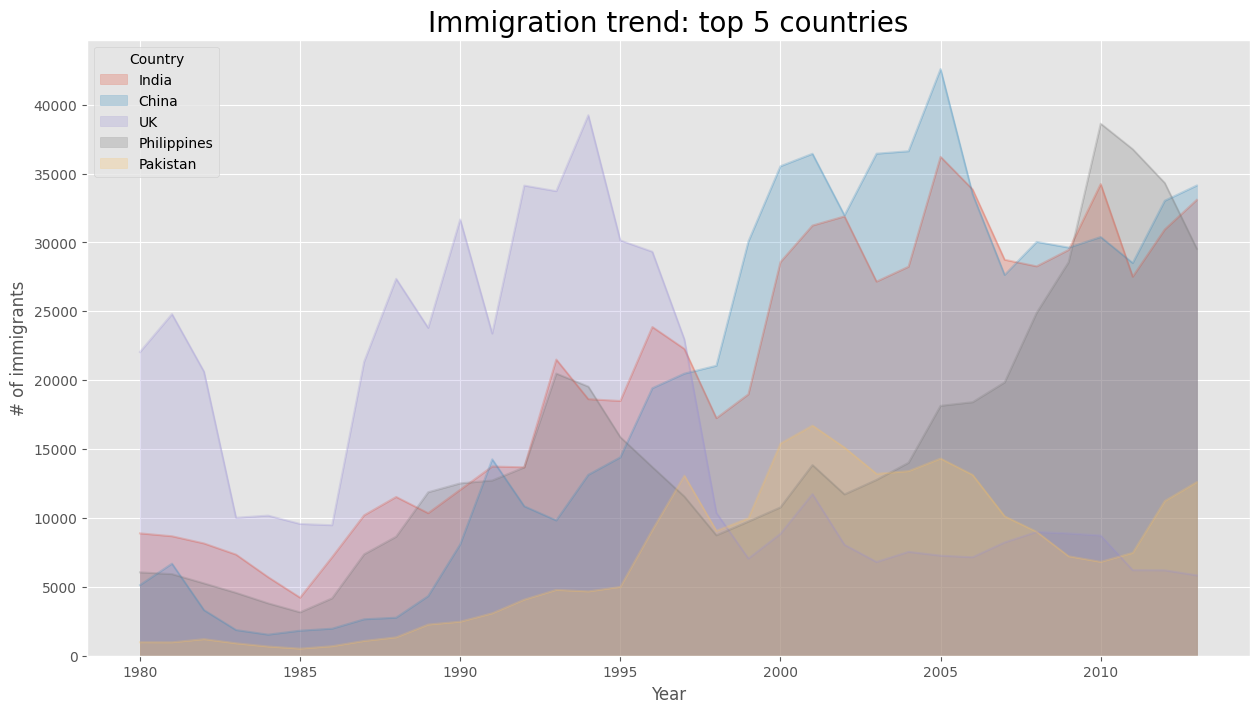

In [58]:
df_top.index.map(int) # convert years back to integers
df_top.plot(kind="area", stacked=False, # by default area charts are stacked
            alpha=0.25, # by default alpha=0.5
            figsize=(15, 8)) # increasing the figsize is another workaround for improving the legend location

plt.title("Immigration trend: top 5 countries", size=20)
plt.xlabel("Year")
plt.ylabel("# of immigrants")
plt.show()

What about matplotlib's OO interface? It is still possible to use it even when plotting with pandas.

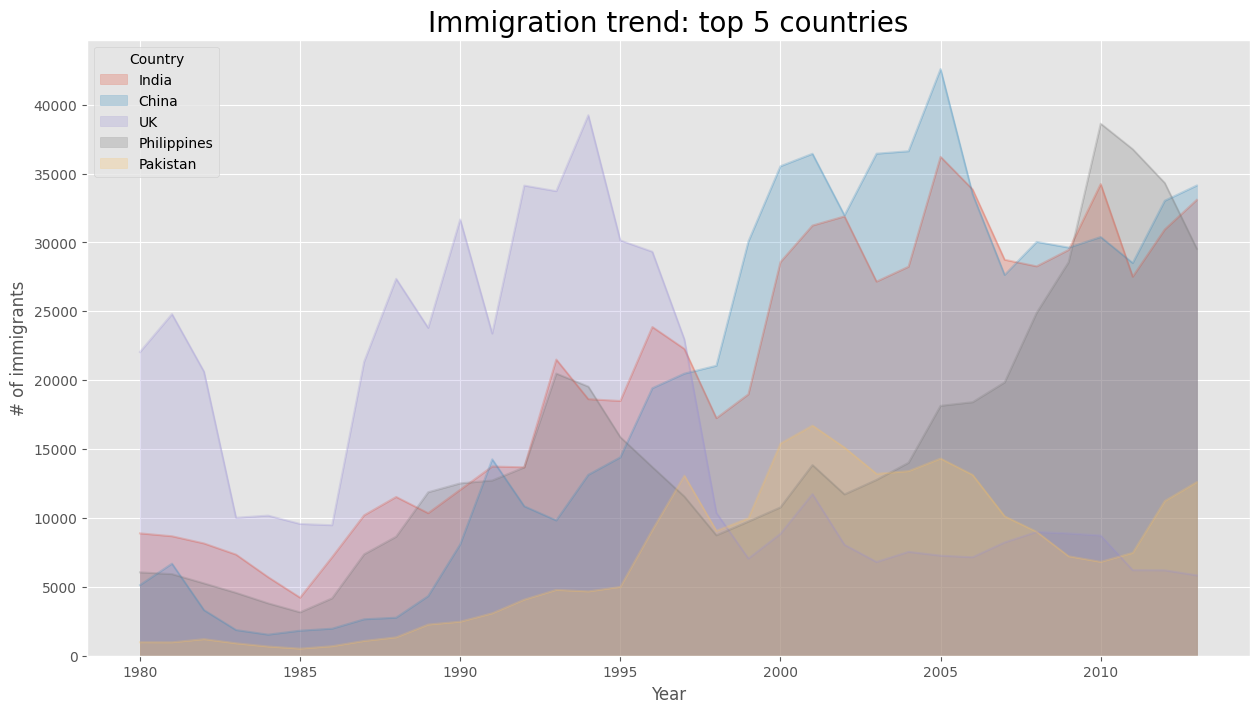

In [59]:
ax = df_top.plot(kind="area", stacked=False,
                 alpha=0.25,
                 figsize=(15, 8))

ax.set_title("Immigration trend: top 5 countries", size=20)
ax.set_xlabel("Year")
ax.set_ylabel("# of immigrants")
plt.show()

### Histograms

Task: Visualize the frequency distribution of the number of new immigrants from the various countries to Canada in 2013.

Before we proceed, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [60]:
count, edges = np.histogram(df['2013'])

print(count)
print(edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


We get 10 bins by default. We see that, for example, 178 countries contributed 0 - 3412.9 immigrants in 2013.

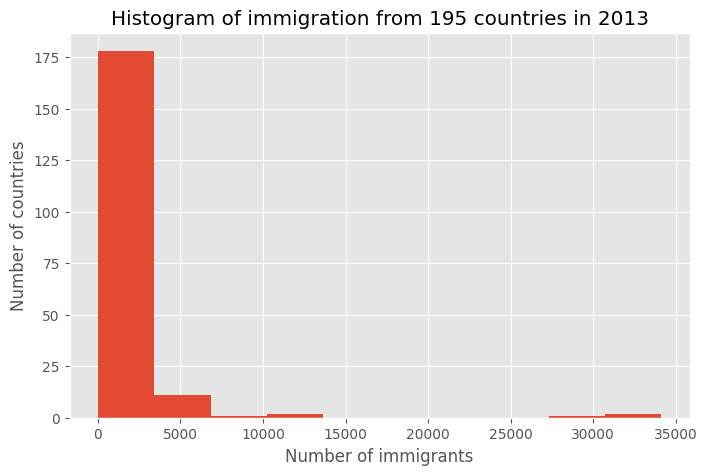

In [61]:
ax = df['2013'].plot(kind='hist', figsize=(8, 5))
ax.set(title="Histogram of immigration from 195 countries in 2013",
      xlabel="Number of immigrants",
      ylabel="Number of countries")
plt.show()

By the way, using `df['2013'].plot(kind='hist')` is equivalent to `df['2013'].plot.hist()`: this holds for other `kind`s of plots.

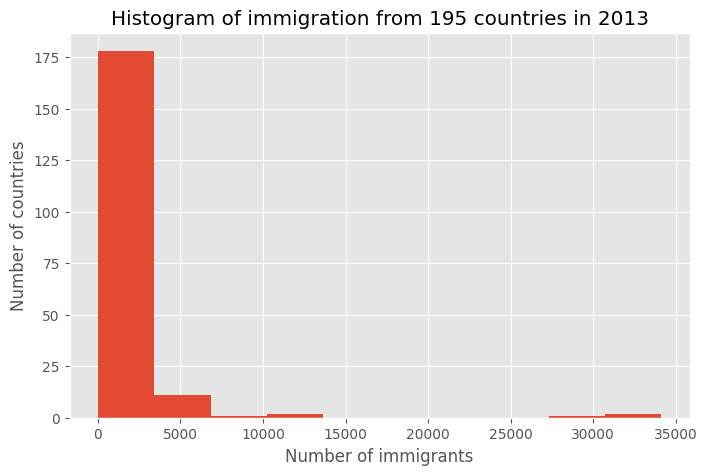

In [62]:
ax = df['2013'].plot.hist(figsize=(8, 5))
ax.set(title="Histogram of immigration from 195 countries in 2013",
      xlabel="Number of immigrants",
      ylabel="Number of countries")
plt.show()

Task: visualize the immigration distribution for Denmark, Norway, and Sweden for the years 1980 - 2013.

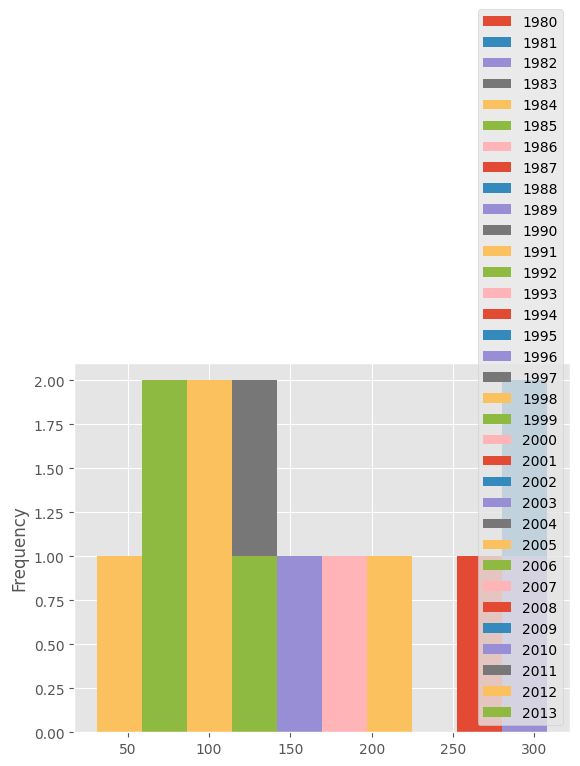

In [63]:
countries = ['Denmark', 'Norway', 'Sweden']

df.loc[countries, years].plot.hist()
plt.show()

Let's fix the issue by transposing the data before plotting. This time, instead of saving the transposed dataframe to a new variable, we do a one-liner:

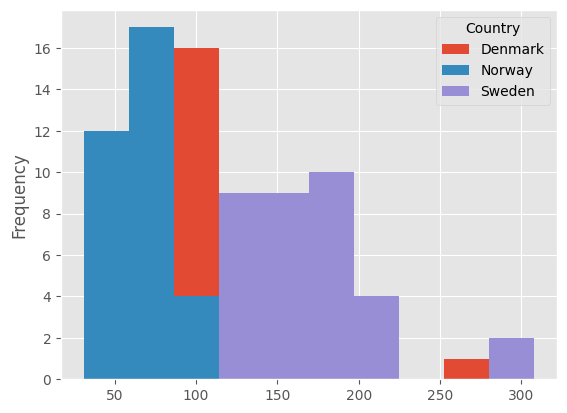

In [64]:
df.loc[countries, years].transpose().plot.hist()
plt.show()

Now we just need to make the plot more readable, by:

- increasing `bins` to 15
- setting the transparency to 70%
- labelling the axes
- customizing the colors
- stretching a bit the figure, setting `figsize=(10, 6)`.

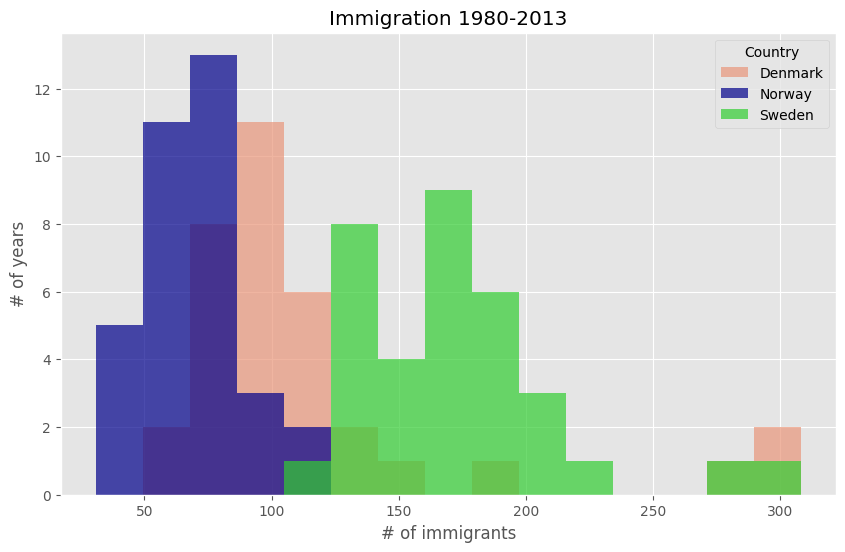

In [65]:
df.loc[countries, years].transpose().plot.hist(figsize=(10, 6),
                                              bins=15,
                                              alpha=0.7,
                                              # stacked=True,
                                              color=['darksalmon', 'darkblue', 'limegreen'])

plt.title("Immigration 1980-2013")
plt.xlabel("# of immigrants")
plt.ylabel("# of years")
plt.show()

### Bar charts

Task: visualize the impact of the 2008-2011 Icelandic financial crisis on the number of Icelandic immigrants to Canada.

With pandas' `plot()` syntax, we'll use `kind='bar'` or `kind='barh'` for vertical and horizontal bar charts, respectively.

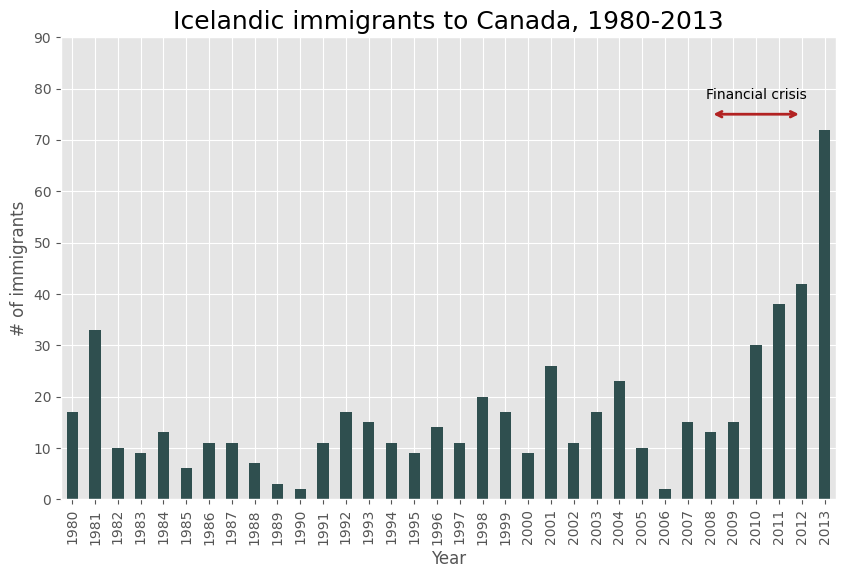

In [66]:
df_i = df.loc['Iceland', years]
df_i.index = df_i.index.map(int)

df_i.plot(kind='bar',
          color='darkslategray',
          figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('# of immigrants')
plt.title('Icelandic immigrants to Canada, 1980-2013', size=18)
plt.ylim(0, 90)

plt.annotate('',
            xy=(32, 75),
            xytext=(28, 75),
            xycoords='data',
            arrowprops=dict(arrowstyle='<->', color='firebrick', lw=2))

plt.text(30, 78, "Financial crisis", horizontalalignment="center")

plt.show()

Task: create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

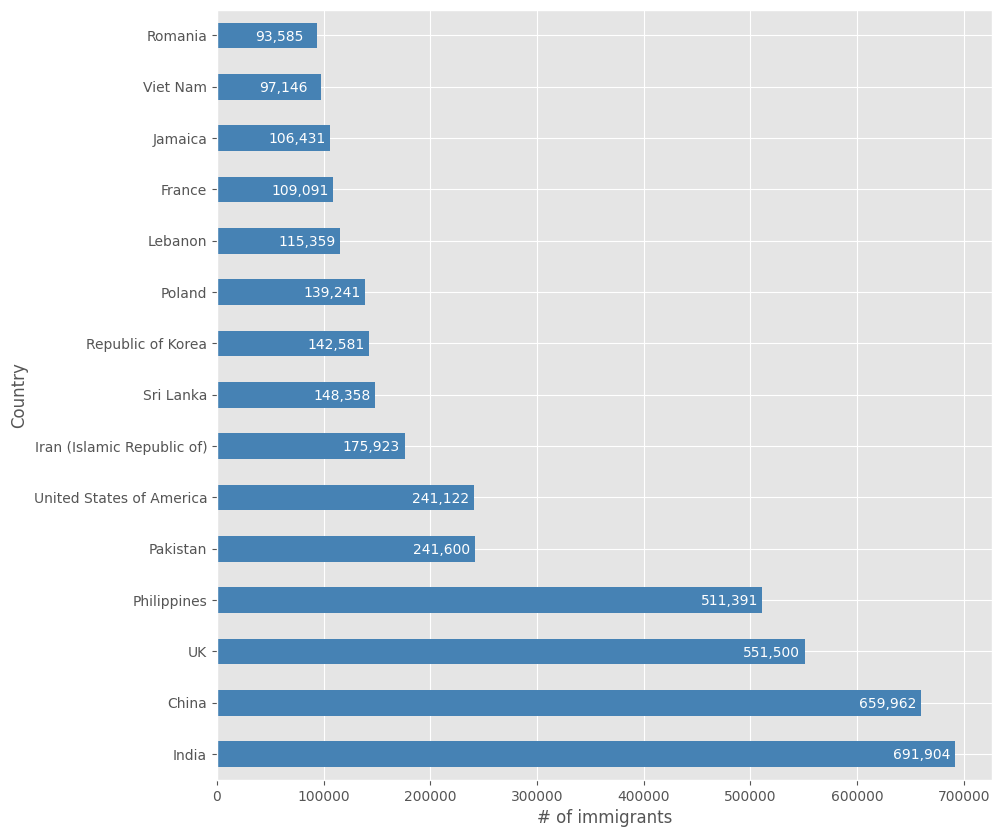

In [67]:
df_top15 = df.sort_values(['Total'], ascending=False)['Total'].head(15)
df_top15.to_frame()

df_top15.plot(kind="barh", color="steelblue",
             figsize=(10, 10))

plt.xlabel('# of immigrants')
plt.ylabel('Country') # not needed actually

for idx, value in enumerate(df_top15):
    label = format(int(value), ',') # format integer numbers with commas as thousand separator
    plt.annotate(label, xy=(value - 58000, idx - 0.10), color="white")
plt.show()

### Pie charts

Task: explore the proportion of new immigrants to Canada grouped by continents for the entire time period from 1980 to 2013.

In [68]:
df_continents = df.groupby('Continent', axis=0).sum()
df_continents.head()

/tmp/ipykernel_732751/1746093157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Sum
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,29188,28284,29890,34534,40892,35441,38083,38543,618948,48815
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,149054,133459,139894,141434,163845,146894,152218,155075,3317794,351025
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,33053,33495,34692,35078,33425,26778,29177,28691,1410947,381738
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24676,26011,26547,26867,28818,27856,27173,24950,765148,185975
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,9613,9463,10190,8995,8142,7677,7892,8503,241142,76824


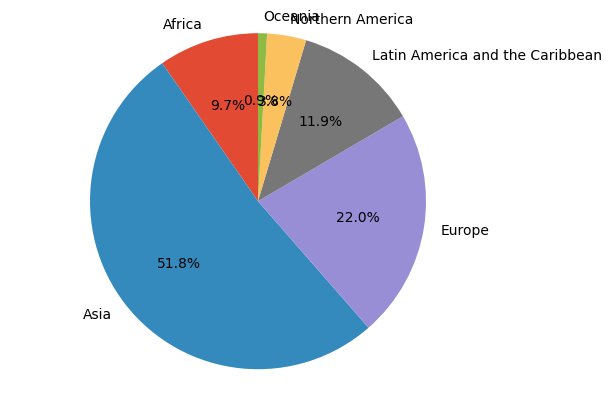

In [69]:
df_continents['Total'].plot(kind='pie',
                            autopct='%1.1f%%', # add and format percentages
                            startangle=90,
                           )

plt.axis('equal') # force equal axes so the pie chart looks like a circle
plt.ylabel('') # turn off y axis label
plt.show()

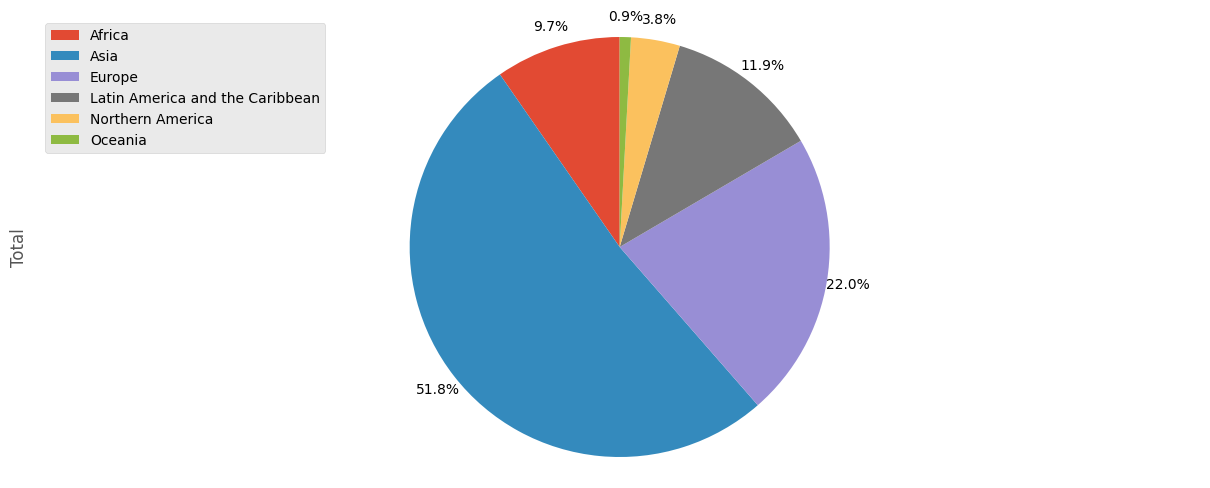

In [70]:
# improved version
df_continents['Total'].plot(kind='pie',
                            autopct='%1.1f%%', # add and format percentages
                            startangle=90,
                            labels=None, # turn off text labels
                            pctdistance=1.1, # move percentages outside
                            figsize=(15, 6)
                           )

plt.axis('equal') # force equal axes so the pie chart looks like a circle
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

### Boxplots

Task: visualize a boxplot of Italian immigrants from 1980-2013.

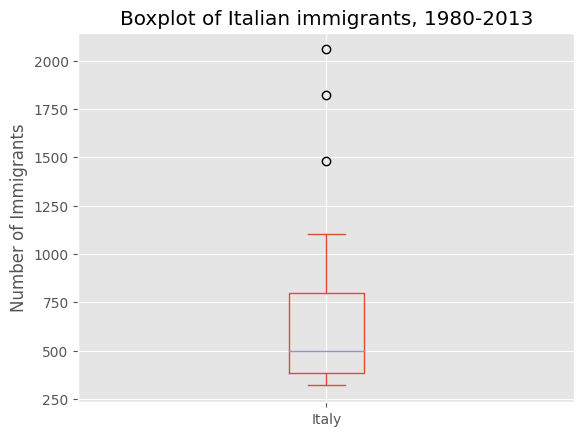

In [71]:
df_ita = df.loc[['Italy'], years].transpose()
df_ita.plot(kind='box')

plt.title("Boxplot of Italian immigrants, 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

Compare the distribution of new immigrants from Italy and Germany for the period 1980 - 2013.

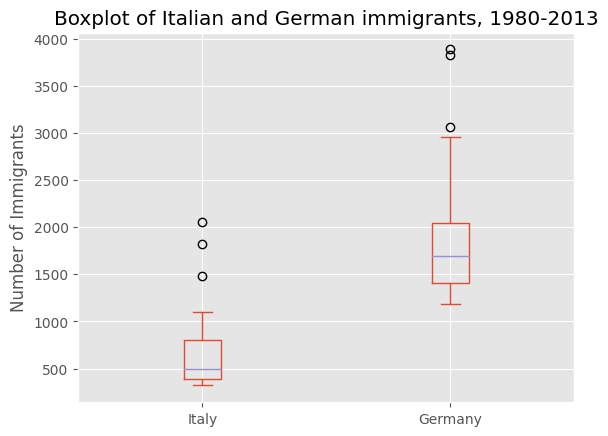

In [72]:
df_ig = df.loc[['Italy', 'Germany'], years].transpose()
df_ig.plot(kind='box')

plt.title("Boxplot of Italian and German immigrants, 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

### Scatter plots

Task: visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

In [73]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


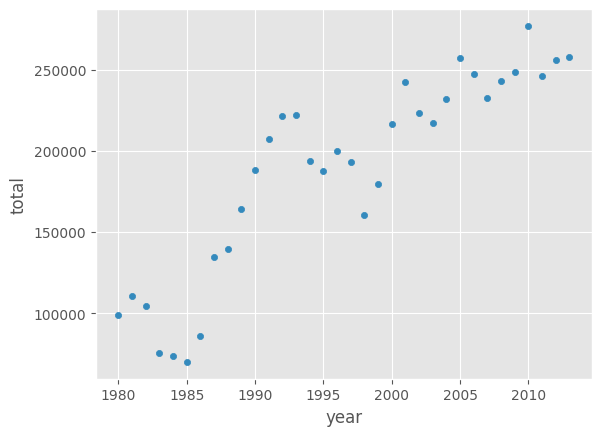

In [74]:
df_tot.plot(kind='scatter', x='year', y='total')

plt.show()

# Seaborn

Seaborn is a visualization library built **on top of Matplotlib**, offering **more modern plot styles** and color defaults, as well as better-looking color palettes. In fact, the look-and-feel of Matplotlib plots is a little old-fashioned in the context of modern data visualization.

Another advantage of Seaborn is its **native handling of Pandas** `DataFrame`s, whereas Matplotlib is not designed for use with them.

Moreover, Seaborn's API is more high-level than Matplotlib's, thus allowing you to create **even complex visualizations with less boilerplate code** than Matplotlib.

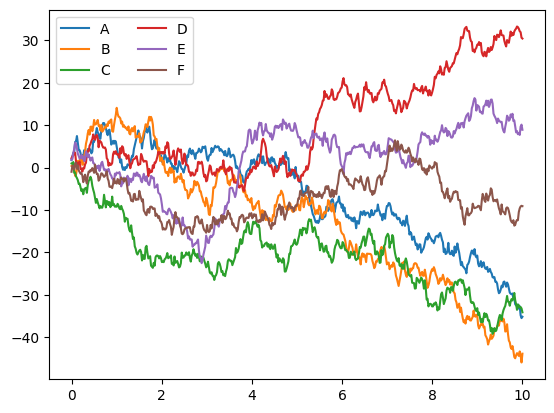

In [75]:
# reset to matplotlib's defaults
mpl.style.use('default')

# data creation
np.random.seed(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

# plot with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc="upper left")
plt.show()

We now load seaborn with its import convention:

In [76]:
import seaborn as sns

While Seaborn has its own plotting functions, it can also overwrite Matplotlib default parameters: we do this by setting the Seaborn style:

In [77]:
sns.set()

And now we can plot with the same code as above:

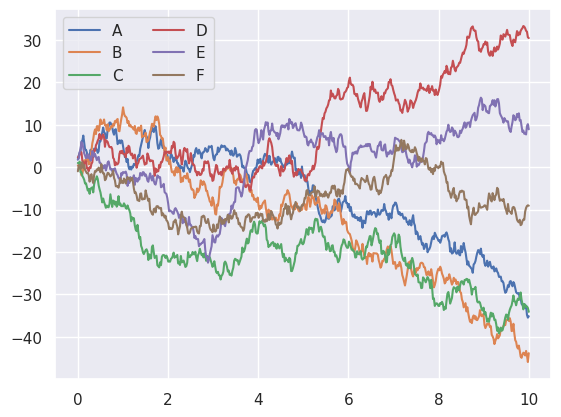

In [78]:
# plot with Seaborn defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc="upper left")
plt.show()

The result is more aesthetically pleasing!

## Seaborn plot gallery

### Histograms and density plots

Seaborn produces histograms with `sns.histplot` and density plots `sns.kdeplot`:

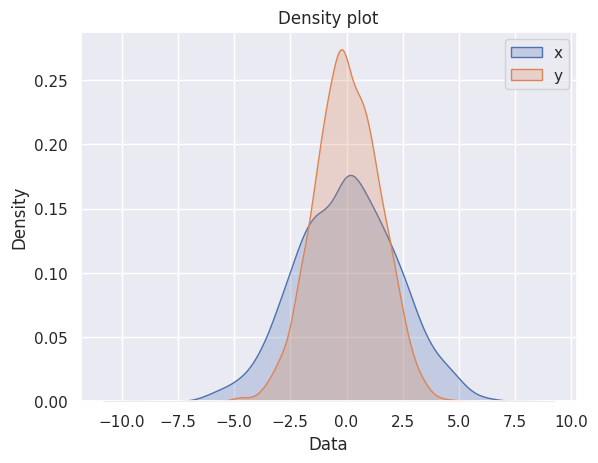

In [79]:
# synthetic data
df = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
df = pd.DataFrame(df, columns=['x', 'y'])

for col in 'xy':
    sns.kdeplot(df[col], fill=True, label=col)

plt.title("Density plot")
plt.xlabel("Data")
plt.legend()
plt.show()

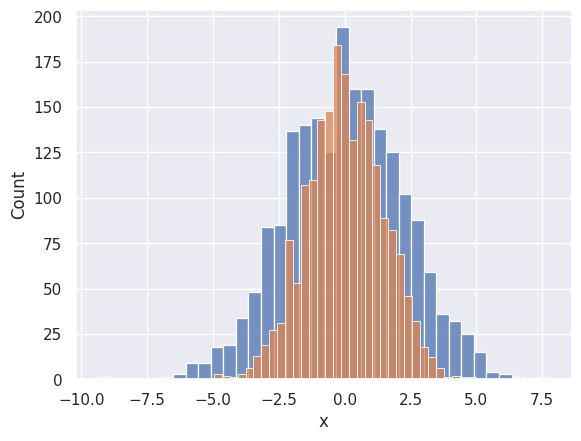

In [80]:
sns.histplot(df['x'])
sns.histplot(df['y'])
plt.show()

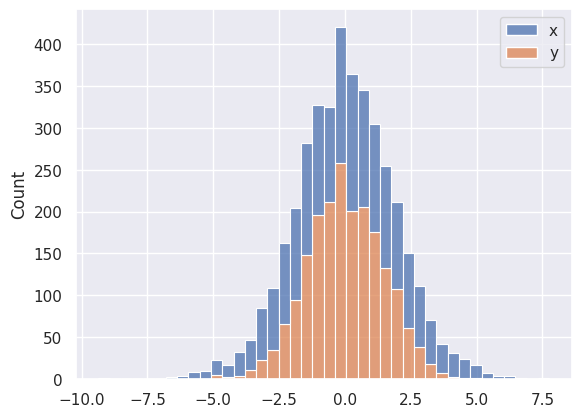

In [81]:
sns.histplot(df, bins=40, multiple="stack");

<AxesSubplot: ylabel='Count'>

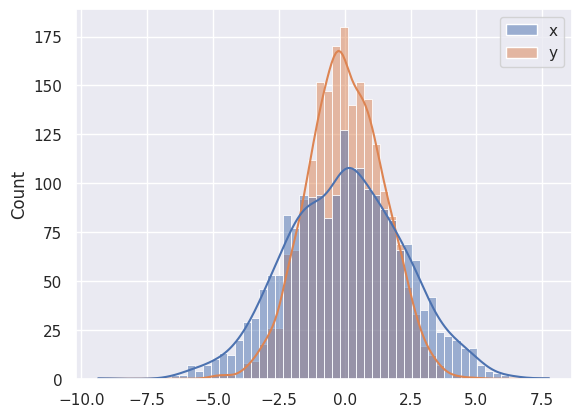

In [82]:
# histogram + KDE
sns.histplot(df, kde=True)

<AxesSubplot: xlabel='x', ylabel='y'>

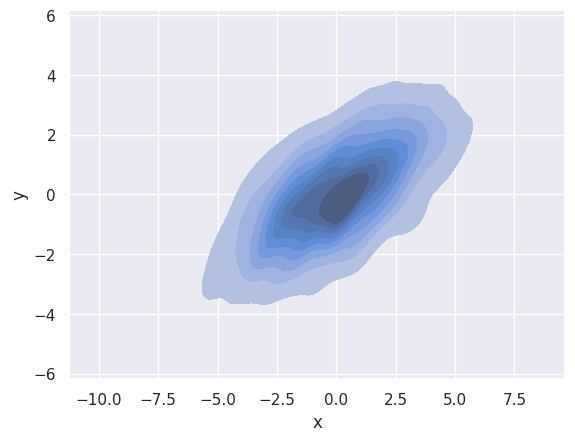

In [83]:
# bivariate KDE plot
sns.kdeplot(df, x="x", y="y", 
            fill=True)

Plots with marginal distributions are obtained with `sns.jointplot`:

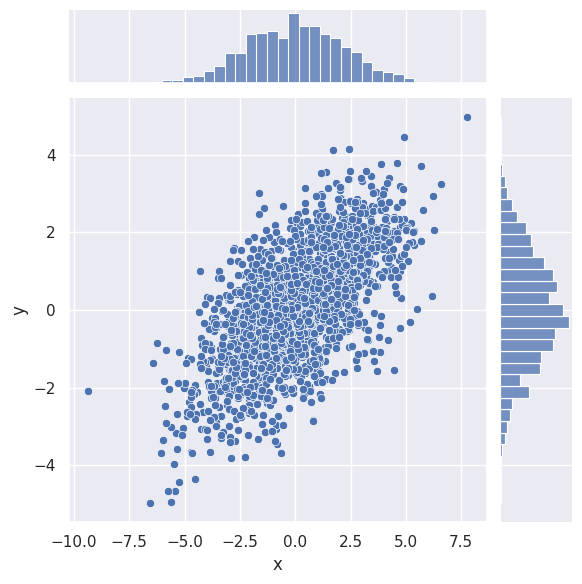

In [84]:
sns.jointplot(x="x", y="y", data=df);

Assigning a `hue` variable will add conditional colors to the plots and an automatic legend:

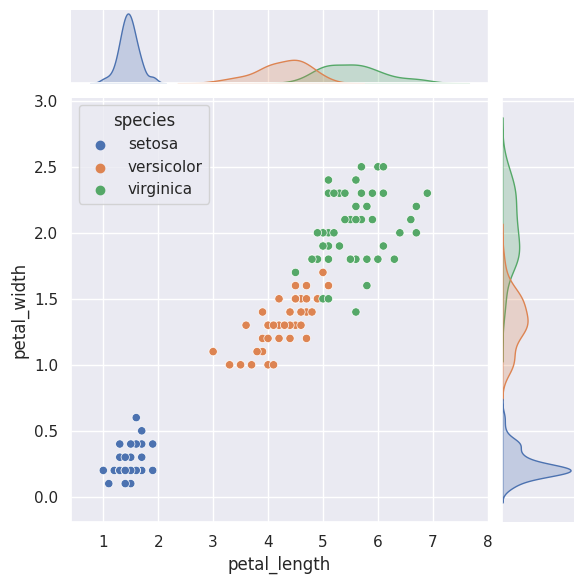

In [85]:
iris = sns.load_dataset("iris")

sns.jointplot(data=iris, x="petal_length", y="petal_width",
              hue="species")

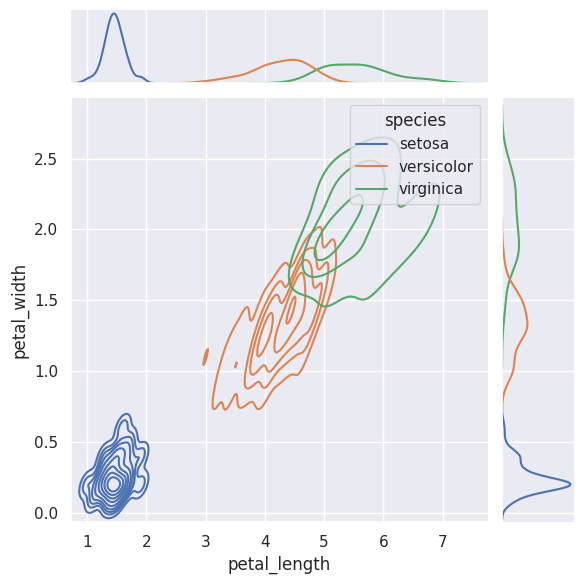

In [86]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              hue="species",
             kind="kde")

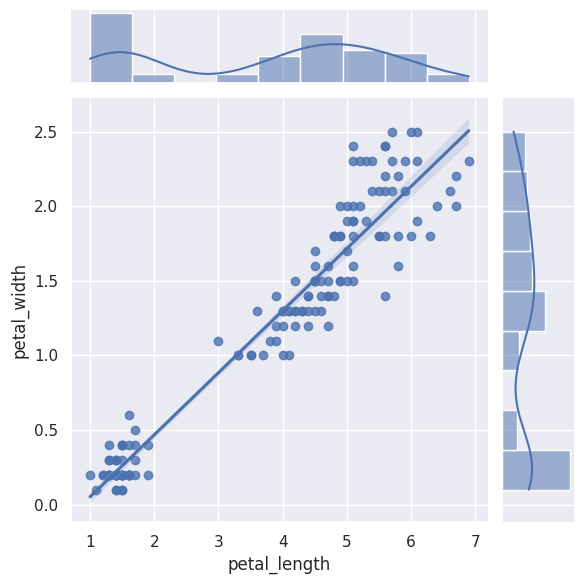

In [87]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              kind="reg")

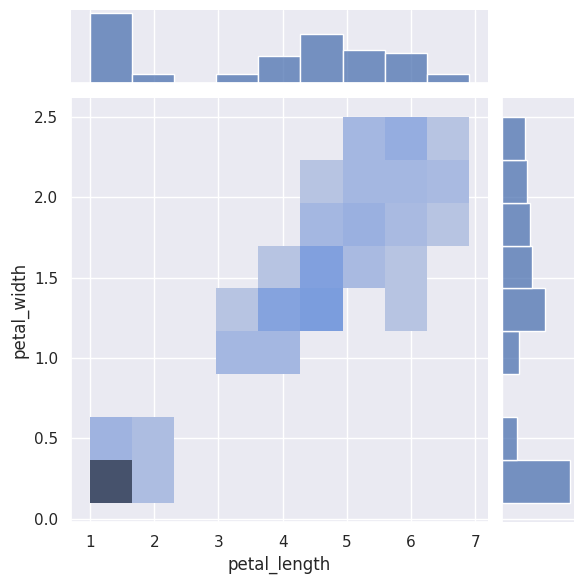

In [88]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              kind="hist") # kind="hex"

### Pair plots

Also called "scatterplot matrices", these kinds of plots are useful to explore correlations in multidimensional data.

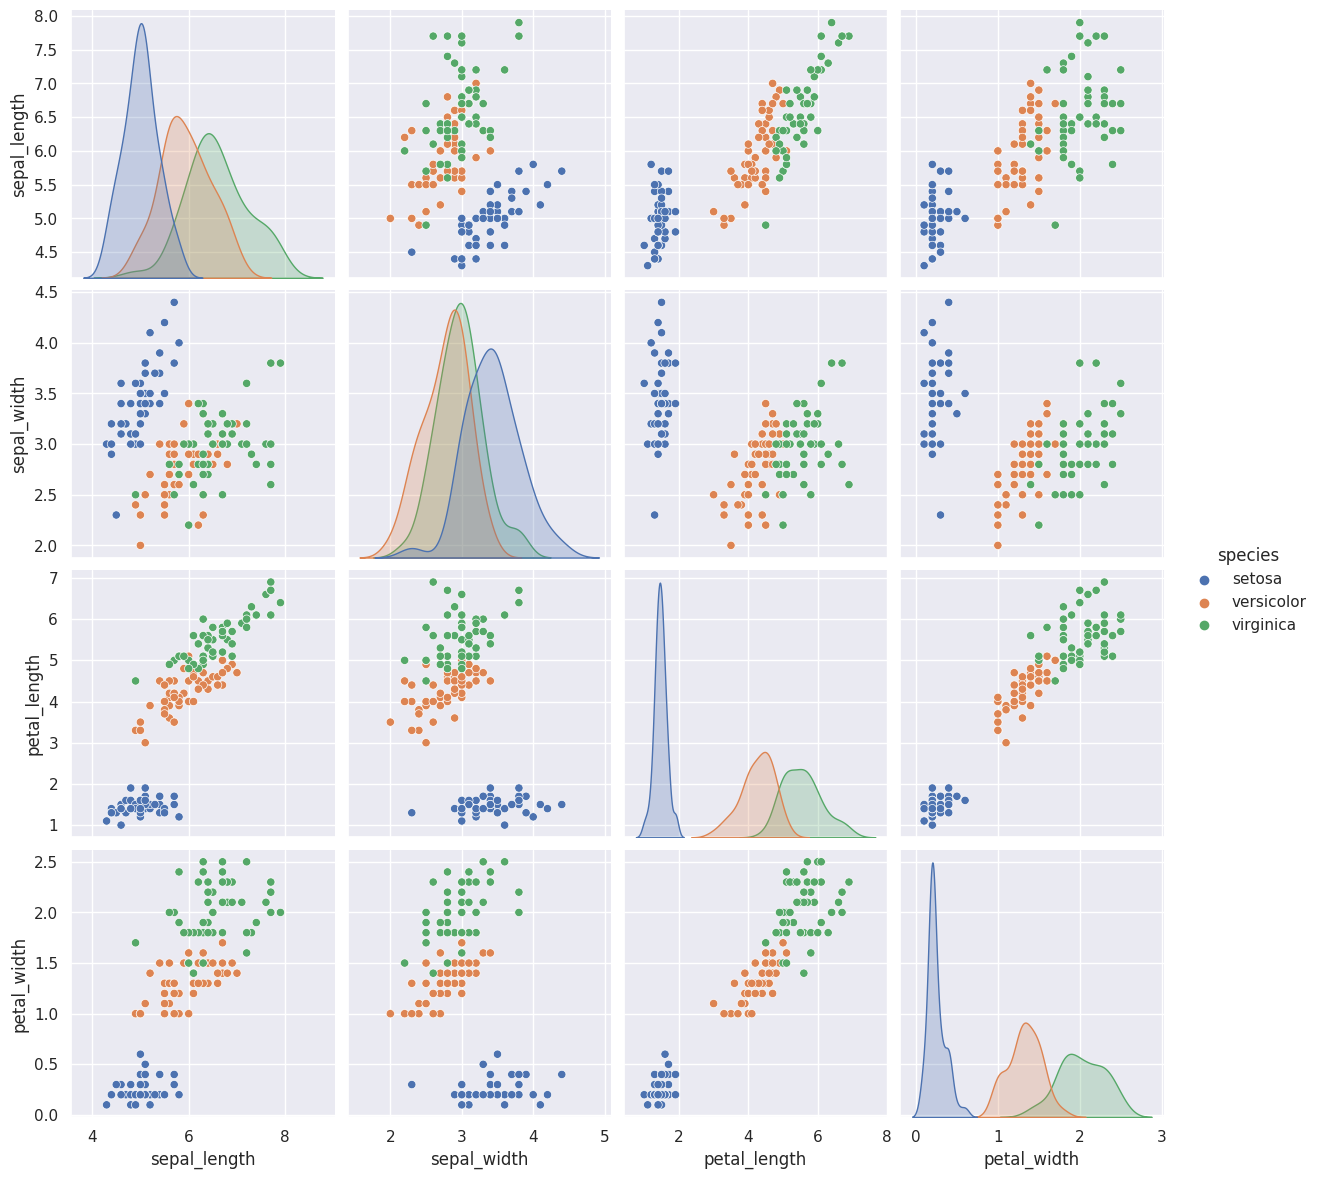

In [89]:
sns.pairplot(iris, hue="species", height=3); # height = h. (inches) of each facet

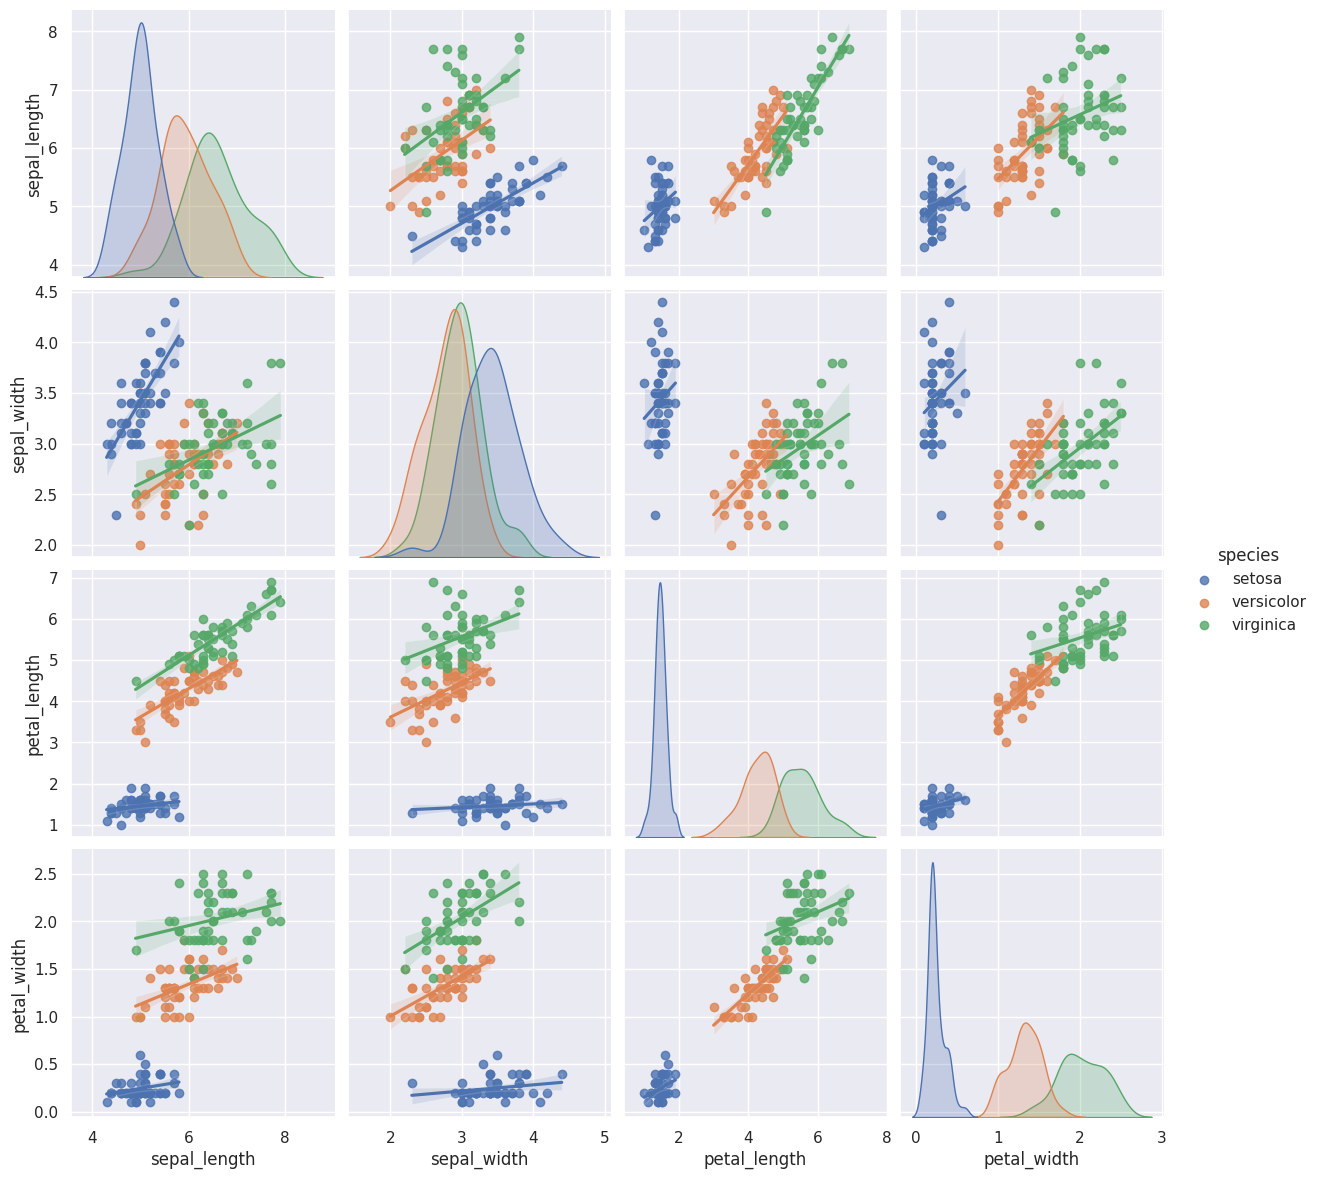

In [90]:
sns.pairplot(iris, hue="species", kind="reg", height=3); # height = h. (inches) of each facet

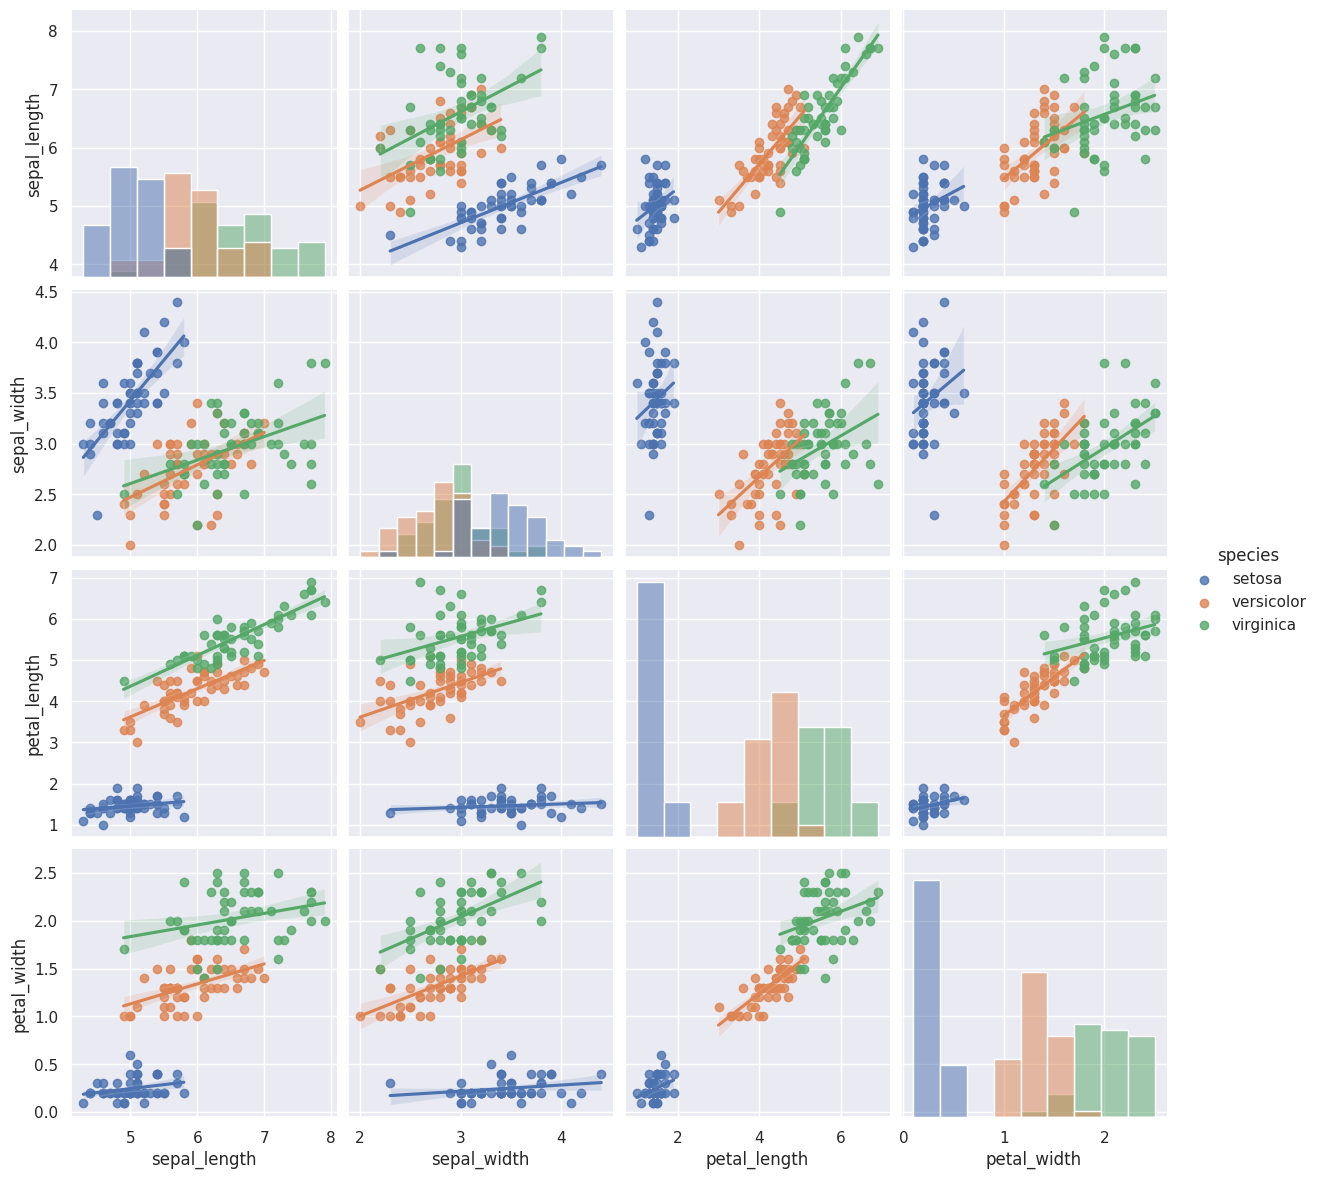

In [91]:
sns.pairplot(iris, hue="species", diag_kind="hist", kind="reg", height=3);

### Faceted plots

In [92]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We want to draw histograms of the tip percentage (which we'll compute), broken down by both `time` and `sex`. We use for this seaborn's `FacetGrid()`

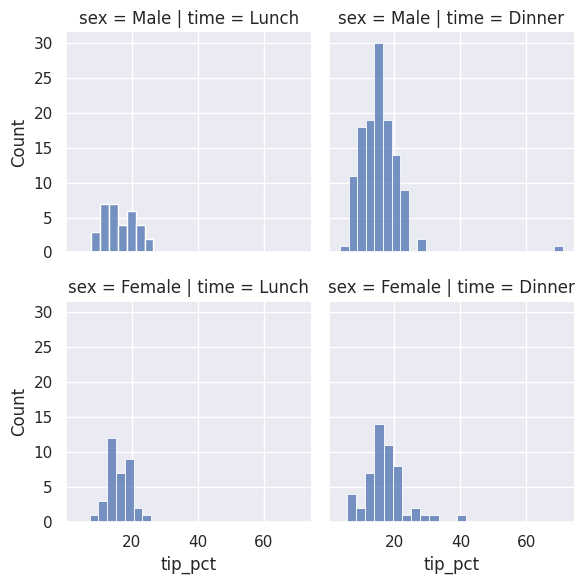

In [93]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time")
grid.map(sns.histplot, "tip_pct");

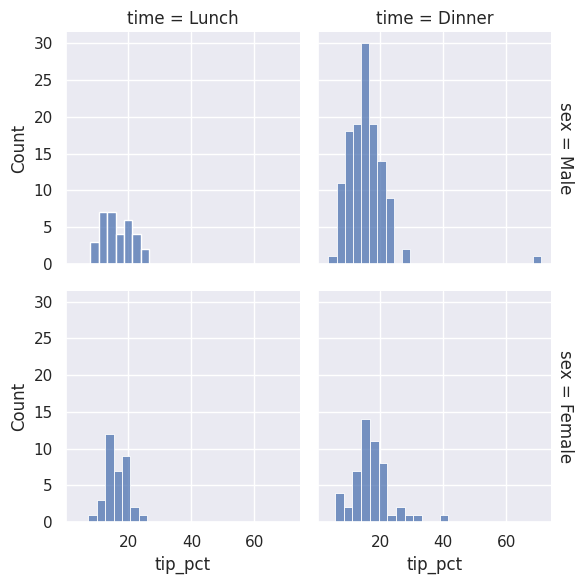

In [94]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True) # margin_titles may not work in all situations
grid.map_dataframe(sns.histplot, x="tip_pct");

Of course we can plot other kinds of charts in the facets:

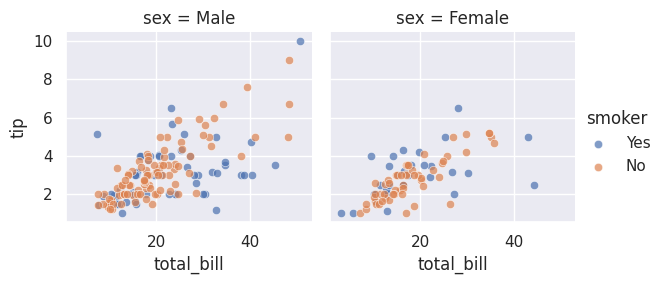

In [95]:
grid = sns.FacetGrid(tips, col="sex", hue="smoker")
grid.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
grid.add_legend()
plt.show()

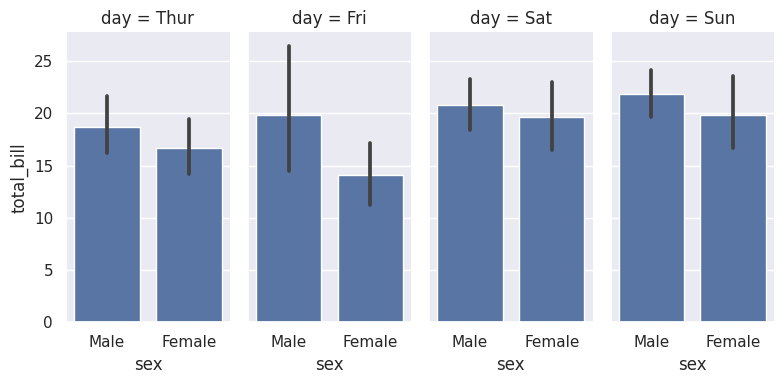

In [96]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])
plt.show()

To adjust some aspects of the `FacetGrid` after we're done with the plotting, we can use `FacetGrid`'s `set()` and `set_axis_labels()` methods:

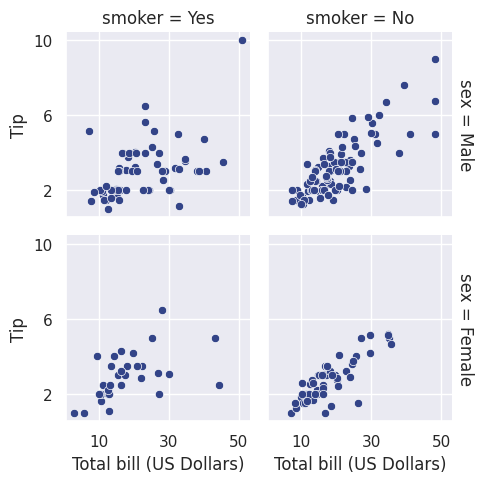

In [97]:
g = sns.FacetGrid(tips, row="sex", col="smoker", height=2.5, margin_titles=True) 
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")

g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])

plt.show()

For additional customization, you can work directly with the underling matplotlib's `Figure` and `Axes` objects: they are stored as member attributes of the `FacetGrid` object at `figure` and `axes_dict`, respectively. When making a figure without row or column faceting, you can also use the `ax` attribute to directly access the single axes.

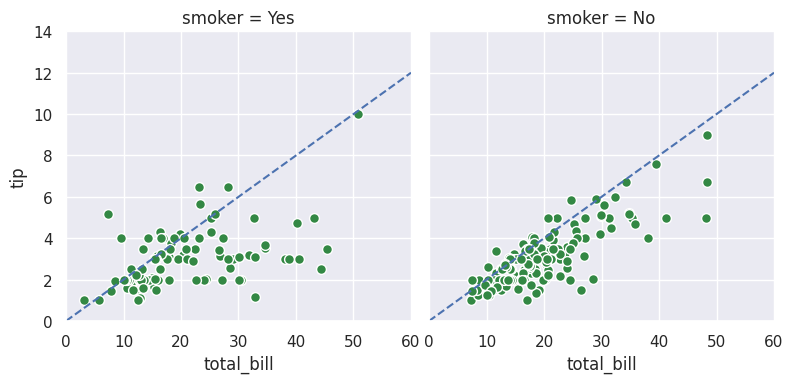

In [98]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)

for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, ls="--")

g.set(xlim=(0, 60), ylim=(0, 14))

plt.show()